## Task 1

In [79]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.data.path.append("/path/to/nltk_data")
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Muha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Muha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Muha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Muha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [80]:
text = "As they ventured deeper, the sound of 45 footsteps echoed.\nSuddenly, a hidden trapdoor sprang open!\nIt was a moment of both surprise and danger.\nThe explorers gasped, realizing they had stumbled upon something far more complex than they had imagined!"
print(text)

As they ventured deeper, the sound of 45 footsteps echoed.
Suddenly, a hidden trapdoor sprang open!
It was a moment of both surprise and danger.
The explorers gasped, realizing they had stumbled upon something far more complex than they had imagined!


In [81]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [82]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict

In [83]:
#text = text.lower()

sentences = sent_tokenize(text)
result_sentences = []

lemma_function = WordNetLemmatizer()

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['S'] = wn.NOUN
tag_map['A'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['ADV'] = wn.ADV

for sentence in sentences:
    tokenization = word_tokenize(sentence) # разделение на слова
    tokens = [word for word in tokenization if word.isalpha() and not word in stopwords.words('english')]
    lemmatized_tokens = []
    
    for word, tag in pos_tag(tokens):
        lemmaWord = lemma_function.lemmatize(word, tag_map[tag[0]])
        lemmatized_token = f'{word}{{{lemmaWord}={tag}}}'
        lemmatized_tokens.append(lemmatized_token)
        
    result_sentence = ' '.join(lemmatized_tokens)
    result_sentences.append(result_sentence)

result_text = '\n'.join(result_sentences)
print(result_text)

As{As=IN} ventured{venture=VBN} deeper{deeper=IN} sound{sound=JJ} footsteps{footstep=NNS} echoed{echo=VBD}
Suddenly{Suddenly=RB} hidden{hidden=JJ} trapdoor{trapdoor=NN} sprang{sprang=NN} open{open=JJ}
It{It=PRP} moment{moment=NN} surprise{surprise=NN} danger{danger=NN}
The{The=DT} explorers{explorer=NNS} gasped{gasp=VBD} realizing{realize=VBG} stumbled{stumble=VBN} upon{upon=IN} something{something=NN} far{far=RB} complex{complex=JJ} imagined{imagine=VBD}


## Task 2

In [88]:
import os
import heapq
from nltk.probability import FreqDist

In [117]:
def abstracts(text_file):
    with open(text_file, 'r', encoding='cp1252') as file:
        article_text = file.read()

    stop_words = set(stopwords.words('english'))
    
    sentences = sent_tokenize(article_text)
    words = word_tokenize(article_text)

    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    word_freq = FreqDist(filtered_words)

    sentence_scores = {}
    for sentence in sentences:
        for word in word_tokenize(sentence):
            if word.lower() in word_freq:
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = word_freq[word.lower()]
                else:
                    sentence_scores[sentence] += word_freq[word.lower()]

    summary_sentences = heapq.nlargest(3, sentence_scores, key=sentence_scores.get)
    return summary_sentences
os.chdir(r"C:\Users\Muha\Desktop\programming\python\task2")
dir_lis = os.listdir()

for file_name in dir_lis:
    summary = abstracts(file_name)
    
    print("Abstract for the", file_name, ':')
    for sentence in summary:
        print(sentence)
    
    print()

Abstract for the article1.txt :
The system receives as input a polyphonic 
music (PCM data) and outputs information of
plagiarized music (music title, time, etc.).
In Similarity Calculation Modules, the 
similarity between the note sequence of the input 
polyphonic music and those of music in the database is 
calculated.
The proposed music 
plagiarism detection system should be a welcome news 
to the music industry.

Abstract for the article2.txt :
In this paper, we address the development of a system that detects plagiarism 
based on the similar melody searching, which is an operation that finds the melodies 
similar to a given query melody from a music database.
Music Plagiarism Detection Using Melody Databases 685 
â€¢ A three-step query processing: it provides fast search ability by taking a three-step 
query processing method, which consists of index searching, window stitching, 
and post-processing.
Similar melody searching is to find 
the melodies similar to a given query melody

## Task 3

In [100]:
import numpy as np
import pandas as pd
import re

In [102]:
data = pd.read_excel(r"C:\Users\Muha\Desktop\programming\python\LabeledText.xlsx", dtype=str)
data.head()

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive


In [104]:
def cleaning(text):
    text = re.sub('[^a-zA-Z]', ' ', str(text).lower().strip())
    text = re.sub('@[A-Za-z0-9_]+', '', text) 
    text = re.sub('#', '', text) 
    text = re.sub('RT[\\s]+', '', text)
    text = re.sub('https?:\\/\\/\S+', '', text) 
    text = re.sub('\n', ' ', text)
    return text

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Muha\AppData\Local\Temp\ipykernel_6544\3059584518.py:6: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?:\\/\\/\S+', '', text)


In [105]:
data["Caption"]=data["Caption"].apply(cleaning)
data.drop("File Name",axis=1,inplace=True)

In [106]:
data.head()

,Caption,LABEL
0,how i feel today legday jelly aching gym,negative
1,arrivatw absolute disgrace two carriages from...,negative
2,this is my valentine s from of my nephews i...,positive
3,betterfeelingfilms rt via instagram first da...,neutral
4,zoe s first love rattled johnnyharper,positive


In [107]:
def lemm(data):
    wordnet = WordNetLemmatizer()
    lemmanized = []
    
    for i in range(len(data)):
        lemmed = []
        tokens = word_tokenize(data['Caption'].iloc[i])
        for words in tokens:
            lemmed.append(wordnet.lemmatize(words))
        lemmanized.append(lemmed)

    data['lemmanized'] = lemmanized
    data['Caption'] = data['lemmanized'].apply(' '.join)
    data = data.drop("lemmanized", axis=1)
    
    return data

In [108]:
data = lemm(data)
data.head()

,Caption,LABEL
0,how i feel today legday jelly aching gym,negative
1,arrivatw absolute disgrace two carriage from b...,negative
2,this is my valentine s from of my nephew i am ...,positive
3,betterfeelingfilms rt via instagram first day ...,neutral
4,zoe s first love rattled johnnyharper,positive


In [111]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [112]:
X_train, X_test, y_train, y_test = train_test_split(data['Caption'], data['LABEL'], test_size=0.2, random_state=48)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6652977412731006


In [118]:
y_pred

array(['neutral', 'positive', 'neutral', 'positive', 'negative',
       'neutral', 'neutral', 'positive', 'positive', 'neutral', 'neutral',
       'negative', 'positive', 'neutral', 'neutral', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'neutral', 'neutral', 'positive', 'positive', 'neutral',
       'positive', 'positive', 'neutral', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'negative',
       'negative', 'negative', 'neutral', 'negative', 'positive',
       'neutral', 'neutral', 'positive', 'positive', 'negative',
       'negative', 'neutral', 'positive', 'negative', 'neutral',
       'positive', 'neutral', 'negative', 'neutral', 'positive',
       'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'positi

In [113]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[197  48  38]
 [ 91 198  79]
 [ 22  48 253]]


In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

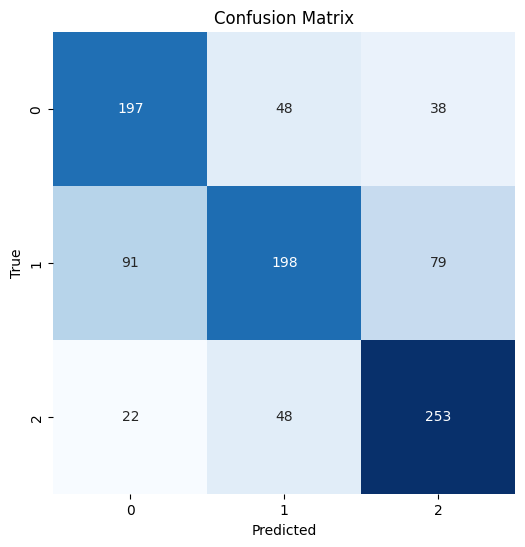

In [116]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)

plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()